In [1]:
#导入需要的库

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# 加载数据，路径改成自己的

df = pd.read_csv('C:\\Users\\123\Desktop\\nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# 打印每一列的列名

print(df.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [5]:
# 打印矩阵的维数

print(df.shape)

(84548, 22)


In [5]:
#将没有解释或者对于数据分析没有意义的列进行删除

del df['EASE-MENT']

del df['Unnamed: 0']

del df['SALE DATE']

In [6]:
#删除重复的行

df = df.drop_duplicates(df.columns, keep='last')

sum(df.duplicated(df.columns))

0

In [7]:
# 打印矩阵的维数
df.shape

(83190, 19)

In [8]:
# 将一些列转换为适当的数据类型

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

In [9]:
# 检查哪些列存在缺失值

df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [11]:
# 用平均值填充缺失值

df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [12]:
# 检查哪些列存在缺失值

df.columns[df.isnull().any()]

Index(['SALE PRICE'], dtype='object')

In [13]:
# 根据SALE PRICE是否缺失分为两个数据集
test = df[df['SALE PRICE'].isna()]
df = df[~df['SALE PRICE'].isna()]

In [14]:
# 打印test的维度，该集的SALE PRICE是缺失的
print(test.shape)

(13909, 19)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69281 entries, 0 to 84547
Data columns (total 19 columns):
BOROUGH                           69281 non-null category
NEIGHBORHOOD                      69281 non-null object
BUILDING CLASS CATEGORY           69281 non-null object
TAX CLASS AT PRESENT              69281 non-null category
BLOCK                             69281 non-null int64
LOT                               69281 non-null int64
BUILDING CLASS AT PRESENT         69281 non-null object
ADDRESS                           69281 non-null object
APARTMENT NUMBER                  69281 non-null object
ZIP CODE                          69281 non-null int64
RESIDENTIAL UNITS                 69281 non-null int64
COMMERCIAL UNITS                  69281 non-null int64
TOTAL UNITS                       69281 non-null int64
LAND SQUARE FEET                  69281 non-null float64
GROSS SQUARE FEET                 69281 non-null float64
YEAR BUILT                        69281 non-null in

In [16]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0


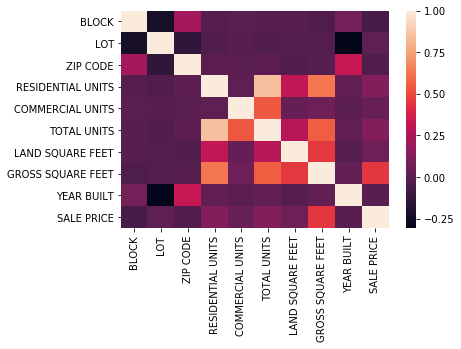

In [19]:
# 寻找特征间的关联

# 创建相关矩阵
corr_matrix = df.corr()

# 创建热图
sns.heatmap(corr_matrix)

In [20]:
# 按与SALE PRICE相关程度为各属性进行排序

corr_matrix['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.449913
TOTAL UNITS          0.126654
RESIDENTIAL UNITS    0.122566
LAND SQUARE FEET     0.060143
COMMERCIAL UNITS     0.044535
LOT                  0.012266
YEAR BUILT          -0.003779
ZIP CODE            -0.034110
BLOCK               -0.061357
Name: SALE PRICE, dtype: float64

In [21]:
# 查看数据集的描述统计信息
numeric_data=df.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69281.000000,69281.000000,69281.000000,69281.000000,69281.000000,69281.000000,6.928100e+04,6.928100e+04,69281.000000,6.928100e+04
mean,4200.305437,374.983473,10739.919458,1.870859,0.164244,2.055109,3.643061e+03,3.640300e+03,1800.113451,1.286521e+06
std,3434.828427,656.820333,1265.389144,14.317577,9.018311,17.026435,3.322172e+04,2.427118e+04,519.752668,1.145690e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1349.000000,21.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.268000e+03,1920.000000,2.350000e+05
50%,3377.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.970000e+03,2.400000e+03,1938.000000,5.350000e+05
75%,6192.000000,879.000000,11249.000000,2.000000,0.000000,2.000000,3.858418e+03,3.891878e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [22]:
# 按价格对交易的总单位进行排序
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,30435
0,0,17563
2,2,12931
3,3,4415
4,4,1256
6,6,662
5,5,334
8,8,310
7,7,145
10,10,124


In [23]:
# 删除总单位2261的与小于0的异常值
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)]

In [24]:
df.shape

(51717, 19)

In [26]:
# 删除超出销售价格上限的观察值
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

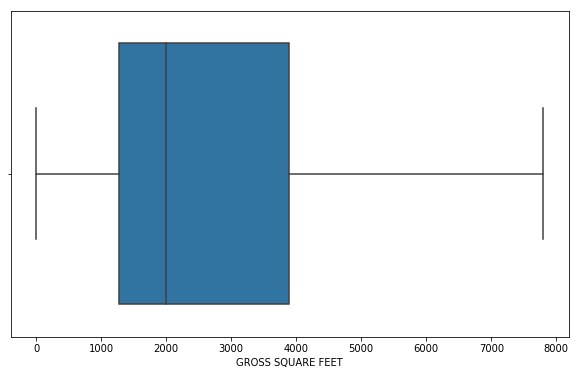

In [27]:
# 绘制总平方英尺箱现图以展示数据分布
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df,showfliers=False)

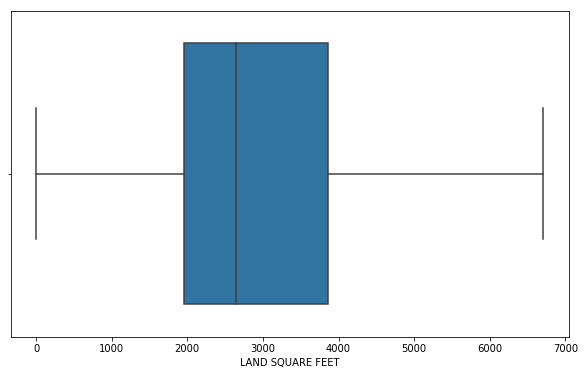

In [28]:
# 土地平方英尺图
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=df,showfliers=False)

In [29]:
# 仅保留
df = df[df['GROSS SQUARE FEET'] < 10000]
df = df[df['LAND SQUARE FEET'] < 10000]

In [30]:
df.shape

(38342, 19)

In [31]:
# 不关注地址与公寓编号
del df['ADDRESS']
del df['APARTMENT NUMBER']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38342 entries, 3 to 84545
Data columns (total 17 columns):
BOROUGH                           38342 non-null category
NEIGHBORHOOD                      38342 non-null object
BUILDING CLASS CATEGORY           38342 non-null object
TAX CLASS AT PRESENT              38342 non-null category
BLOCK                             38342 non-null int64
LOT                               38342 non-null int64
BUILDING CLASS AT PRESENT         38342 non-null object
ZIP CODE                          38342 non-null int64
RESIDENTIAL UNITS                 38342 non-null int64
COMMERCIAL UNITS                  38342 non-null int64
TOTAL UNITS                       38342 non-null int64
LAND SQUARE FEET                  38342 non-null float64
GROSS SQUARE FEET                 38342 non-null float64
YEAR BUILT                        38342 non-null int64
TAX CLASS AT TIME OF SALE         38342 non-null category
BUILDING CLASS AT TIME OF SALE    38342 non-null o

In [33]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [34]:
# 使用log(x + 1)转换数字特征
from scipy.stats import skew
skewed = df[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df[skewed] = np.log1p(df[skewed])


In [35]:
# 归一化数值列

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[numeric_data.columns])
scaled = scaler.transform(df[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       df[col] = scaled[:,i]

In [36]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.552838,-0.871424,C4,-1.442057,4.726583,-0.204406,4.897089,-0.332369,3.247655,0.176451,2,C4,2.478171
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.545023,-0.654228,C4,-1.442057,4.109626,-0.204406,4.245205,-0.669316,1.421318,0.191071,2,C4,2.174164
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,-1.584890,1.174680,R2,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,-3.818937,2,R2,-0.206132
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.611925,1.175214,R4,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,0.191071,2,R4,0.094653
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.611925,1.175747,R4,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,0.191071,2,R4,0.113914


In [37]:
# 删除无用列
del df['BUILDING CLASS AT PRESENT']
del df['BUILDING CLASS AT TIME OF SALE']
del df['NEIGHBORHOOD']

In [38]:
df.shape


(38342, 14)

In [40]:
# 选择要进行一键编码的变量
one_hot_columns = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']

In [41]:
# 将分类变量转换为哑变量/指标变量（即一键编码）
one_hot_encoded = pd.get_dummies(df[one_hot_columns])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38342 entries, 3 to 84545
Data columns (total 56 columns):
BOROUGH_1                                                               38342 non-null uint8
BOROUGH_2                                                               38342 non-null uint8
BOROUGH_3                                                               38342 non-null uint8
BOROUGH_4                                                               38342 non-null uint8
BOROUGH_5                                                               38342 non-null uint8
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         38342 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         38342 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       38342 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           38342 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND    

In [42]:
# 替换目录变量为哑变量

fdf = df.drop(one_hot_columns,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)

In [43]:
fdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38342 entries, 3 to 84545
Data columns (total 66 columns):
BLOCK                                                                   38342 non-null float64
LOT                                                                     38342 non-null float64
ZIP CODE                                                                38342 non-null float64
RESIDENTIAL UNITS                                                       38342 non-null float64
COMMERCIAL UNITS                                                        38342 non-null float64
TOTAL UNITS                                                             38342 non-null float64
LAND SQUARE FEET                                                        38342 non-null float64
GROSS SQUARE FEET                                                       38342 non-null float64
YEAR BUILT                                                              38342 non-null float64
SALE PRICE                          

In [44]:
fdf.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,...,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4
3,-1.552838,-0.871424,-1.442057,4.726583,-0.204406,4.897089,-0.332369,3.247655,0.176451,2.478171,...,0,0,1,0,0,0,0,1,0,0
6,-1.545023,-0.654228,-1.442057,4.109626,-0.204406,4.245205,-0.669316,1.421318,0.191071,2.174164,...,0,0,1,0,0,0,0,1,0,0
76,-1.584890,1.174680,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,-3.818937,-0.206132,...,1,0,0,0,0,0,0,1,0,0
79,-1.611925,1.175214,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,0.191071,0.094653,...,1,0,0,0,0,0,0,1,0,0
80,-1.611925,1.175747,-1.442057,-0.514625,-0.204406,-0.640828,0.691653,1.183694,0.191071,0.113914,...,1,0,0,0,0,0,0,1,0,0


In [45]:
Y_fdf = fdf['SALE PRICE']

X_fdf = fdf.drop('SALE PRICE', axis=1)

X_fdf.shape , Y_fdf.shape

((38342, 65), (38342,))

In [46]:
# 将矩阵随机划分为训练子集和测试子集
from sklearn.model_selection import train_test_split 
X_train ,X_test, Y_train , Y_test = train_test_split(X_fdf , Y_fdf , test_size = 0.2 , random_state = 1)

In [47]:
# 训练集维度

X_train.shape , Y_train.shape

((30673, 65), (30673,))

In [48]:
# 测试集维度

X_test.shape , Y_test.shape

((7669, 65), (7669,))

In [49]:
# 计算均方根误差
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [50]:
# 数据建模
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [51]:
# 线性回归

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [54]:
# 打印均方根误差
print("线性回归均方误差 : "+str(rmse(Y_test, Y_pred_lr)))

线性回归均方误差 : 0.7607248247690734


In [53]:
# 套索回归
alpha=0.00099
lasso_regr = Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso = lasso_regr.predict(X_test)

In [57]:
print("套索回归均方误差 : "+str(rmse(Y_test, Y_pred_lasso)))

套索回归均方误差 : 0.7624672641410694


In [56]:
# 随机森林回归
rfr = RandomForestRegressor(n_estimators = 100, random_state = 1)
rfr.fit(X_train, Y_train)
Y_pred_rf = rfr.predict(X_test)

In [58]:
print("随机森林回归均方误差 : "+str(rmse(Y_test, Y_pred_rf)))

随机森林回归均方误差 : 0.571589483299918


In [60]:
# 使用R2 决定系数评估回归模型
print("线性回归评估 : "+str(r2_score(Y_test, Y_pred_lr)))
print("套索回归评估 : "+str(r2_score(Y_test, Y_pred_lasso)))
print("随机森林回归评估 : "+str(r2_score(Y_test, Y_pred_rf)))

线性回归评估 : 0.42973634665130134
套索回归评估 : 0.42712097829061046
随机森林回归评估 : 0.6780495966505143
